# import
---------------------------------------

In this section, you can learn how to import network data from various type of file format, for example local file, URLs, web services, and your creating data.

## Supported format
---------------------------------------

In py2cytoscape, there are some supported formats that you can import.

- Cytoscape.js
- NetworkX
- Pandas DataFrame
- igraph (TBD)
- Numpy adjacency matrix (binary or weighted) (TBD)
- GraphX (TBD)

## Table of contents
---------------------------------------

In this section, we import data from various type of format and data type. In addition to supported formats that are menthioned above, we will import some python's data format data.

- Create empty network
- Load networks from files, URLs or web service
- Create networks from various types of data

# Create empty network
---------------------------------------

First, you learn how to create empty network.

In [ ]:
# Empty network
empty1 = cy.network.create()

# With name
empty2 = cy.network.create(name='Created in Jupyter Notebook')

# With name and collection name
empty3 = cy.network.create(name='Also created in Jupyter', collection='New network collection')

# Load networks from files, URLs or web services
---------------------------------------

To load network data from files, URLs or web services is your usual task. By using following code, you can import data from such kind of data format.



In [65]:
# import data from url
from py2cytoscape.data.cyrest_client import CyRestClient
from IPython.display import Image

# Create REST client for Cytoscape
cy = CyRestClient()

# Reset current session for fresh start
cy.session.delete()

# Load a sample network
network1 = cy.network.create_from('http://chianti.ucsd.edu/~kono/data/galFiltered.sif')

# Load a single local file
net_from_local2 = cy.network.create_from('../sampleData/galFiltered.json')
net_from_local1 = cy.network.create_from('../sampleData/sample_yeast_network.xgmml', collection='My Collection')
net_from_local2 = cy.network.create_from('../sampleData/galFiltered.gml', collection='My Collection')

# Load from multiple locations
network_locations = [
    # Static file on a web server
    'http://chianti.ucsd.edu/cytoscape-data/galFiltered.sif', 
    # or a web service
    'http://www.ebi.ac.uk/Tools/webservices/psicquic/intact/webservices/current/search/query/brca1?format=xml25' 
]

# This requrns Series
networks = cy.network.create_from(network_locations)
pd.DataFrame(networks, columns=['CyNetwork'])

,CyNetwork
http://chianti.ucsd.edu/cytoscape-data/galFiltered.sif,<py2cytoscape.data.cynetwork.CyNetwork object ...
http://www.ebi.ac.uk/Tools/webservices/psicquic/intact/webservices/current/search/query/brca1?format=xml25,<py2cytoscape.data.cynetwork.CyNetwork object ...


# Create networks from various types of data
---------------------------------------

Currently, py2cytoscape accepts the following data as input:
- Cytoscape.js
- NetworkX
- Pandas DataFrame
- igraph
- Numpy adjacency matrix (binary or weighted)
- GraphX

In the followin sections, you can look some examples of how to import various kinds of data type.


## From Cytoscape.js JSON
---------------------------------------

In [45]:
# import 
from py2cytoscape.data.cyrest_client import CyRestClient
import py2cytoscape.util.cytoscapejs as cyjs
from IPython.display import Image

# Create REST client for Cytoscape
cy = CyRestClient()

# Reset current session for fresh start
cy.session.delete()

# Cytoscape.js JSON
n1 = cy.network.create(data=cyjs.get_empty_network(), name='Created from Cytoscape.js JSON')


## From NetworkX
---------------------------------------

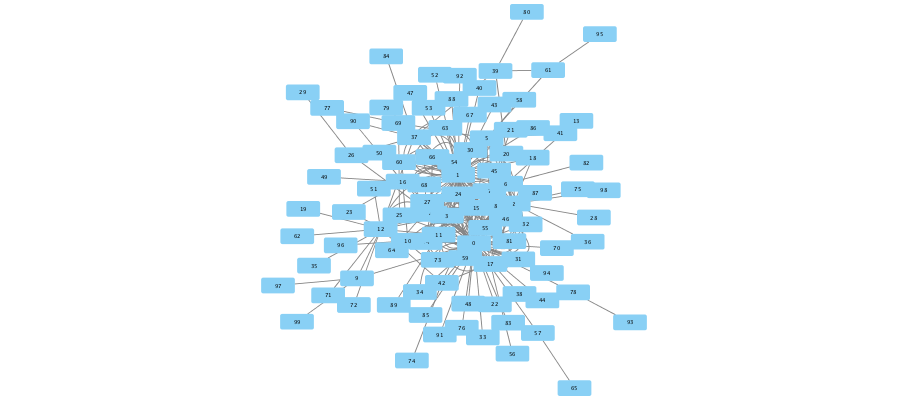

In [84]:
# import 
from py2cytoscape.data.cyrest_client import CyRestClient
import networkx as nx
from IPython.display import Image

# Create REST client for Cytoscape
cy = CyRestClient()

# Reset current session for fresh start
cy.session.delete()

# Create NetworkX data object
nx_graph  = nx.scale_free_graph(100)

# Generate cytoscape network object from networkx
scale_free100 = cy.network.create_from_networkx(nx_graph, collection='Generated by NetworkX')

# Apply layout to the cytoscape network object
cy.layout.apply(network = scale_free100)

# Show it!!
Image(scale_free100.get_png(height=400))

## From Pandas DataFrame
---------------------------------------

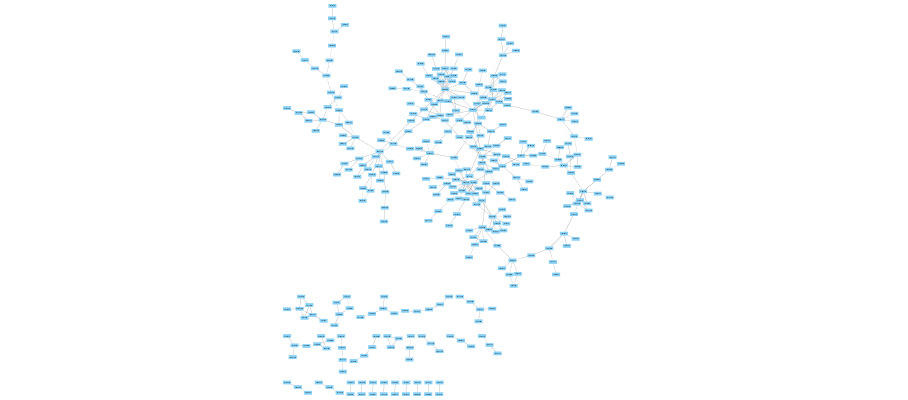

In [87]:
# import
from py2cytoscape.data.cyrest_client import CyRestClient
import pandas as pd
from IPython.display import Image

# Create REST client for Cytoscape
cy = CyRestClient()

# Reset current session for fresh start
cy.session.delete()

# Import Pandas DataFrame from a simple text table
df_from_sif = pd.read_csv('../sampleData/galFiltered.sif', names=['source', 'interaction', 'target'], sep=' ')

# Get the network object
network1 = cy.network.create_from_dataframe(df_from_sif)

# Apply layout 
cy.layout.apply(network = network1)

# Show it!!
Image(network1.get_png(height=400))

## igraph
---------------------------------------

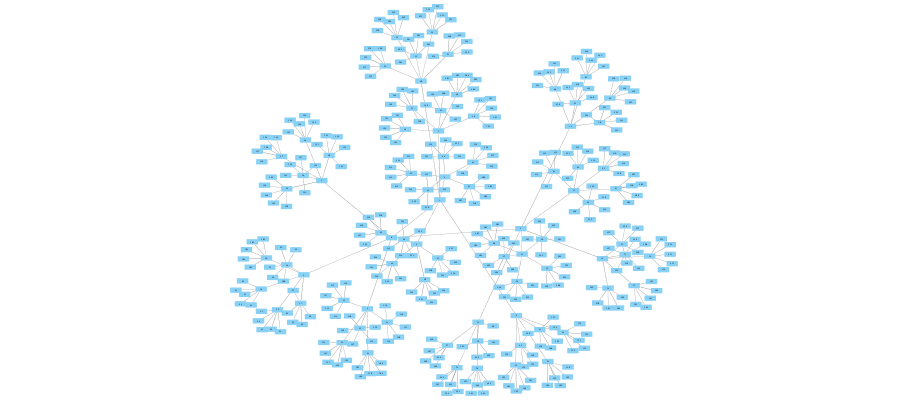

In [35]:
# import
from py2cytoscape.data.cyrest_client import CyRestClient
import igraph as ig
from IPython.display import Image

# Create REST client for Cytoscape
cy = CyRestClient()

# Reset current session for fresh start
cy.session.delete()

# igraph
ig_data = ig.Graph.Tree(400, 5)

# Get the network object from igraph data
network_igraph = cy.network.create_from_igraph(ig_data)

# Apply layout to network
cy.layout.apply(network = network_igraph)

# Show it!!
Image(network_igraph.get_png(height=400))

## Numpy adjacency matrix (binary or weighted)
---------------------------------------

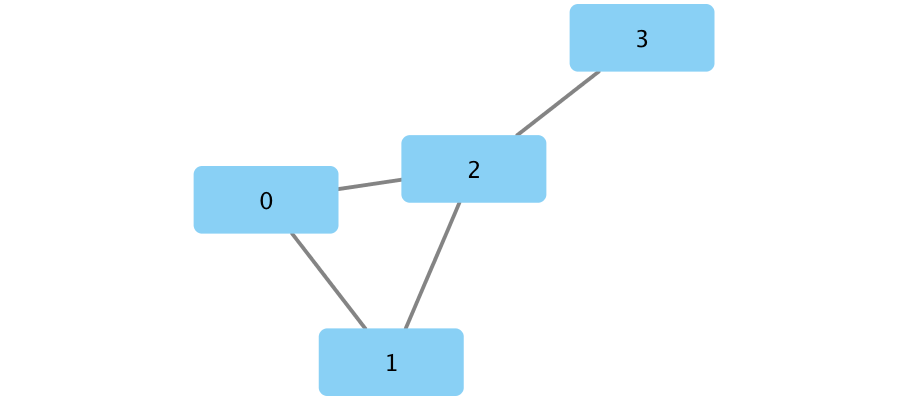

In [29]:
# Import
from py2cytoscape.data.cyrest_client import CyRestClient
import numpy as np
from IPython.display import Image

# Create REST client for Cytoscape
cy = CyRestClient()

# Reset current session for fresh start
cy.session.delete()

# Prepare ndarray data
matrix1 = np.array([
    [0, 1, 1, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 0]
])

# Generate cytoscape network obejct from ndarray
net1 = cy.network.create_from_ndarray(matrix1, name='binary sample')

# Apply layout
cy.layout.apply(network=net1)
cy.layout.fit(network=net1)

# Show it!!
Image(net1.get_png(height=400))

## GraphX
---------------------------------------

In [88]:
# todo